In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import cmocean 
import pickle

Colors from: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

Colormaps from: https://matplotlib.org/tutorials/colors/colormaps.html

Bison colormap from: https://matplotlib.org/cmocean/

In [60]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16

In [144]:
#testdata

n_grass = np.random.randint(0,100, (1,1000))[0]
n_bison = np.random.randint(0,80, (1,1000))[0]
avg_alt = np.random.rand(1000)
alt_sd = np.random.rand(1000) / 4

data_names =  ['Number of bison', 'Number of grass patches', 'Average altruism', 'SD altruism']
colors = ['saddlebrown', 'green', 'orange', 'moccasin']

timestep_str = 'Timesteps'
test_data = pd.DataFrame([n_grass, n_bison, avg_alt, alt_sd], data_names).T

### Data binnenhalen

In [189]:
exp_name = 'first_experiment'

param_pickle = 'data/' + exp_name + '_parameters.pickle'
results_pickle = 'data/' + exp_name + '_results.pickle'

params = pickle.load(open(param_pickle, "rb" ))
results = pd.read_pickle(results_pickle)

number_grass_growth           5
Run                          49
amount_grass_growth           4
bison_reproduce_threshold    10
Name: 49, dtype: int64


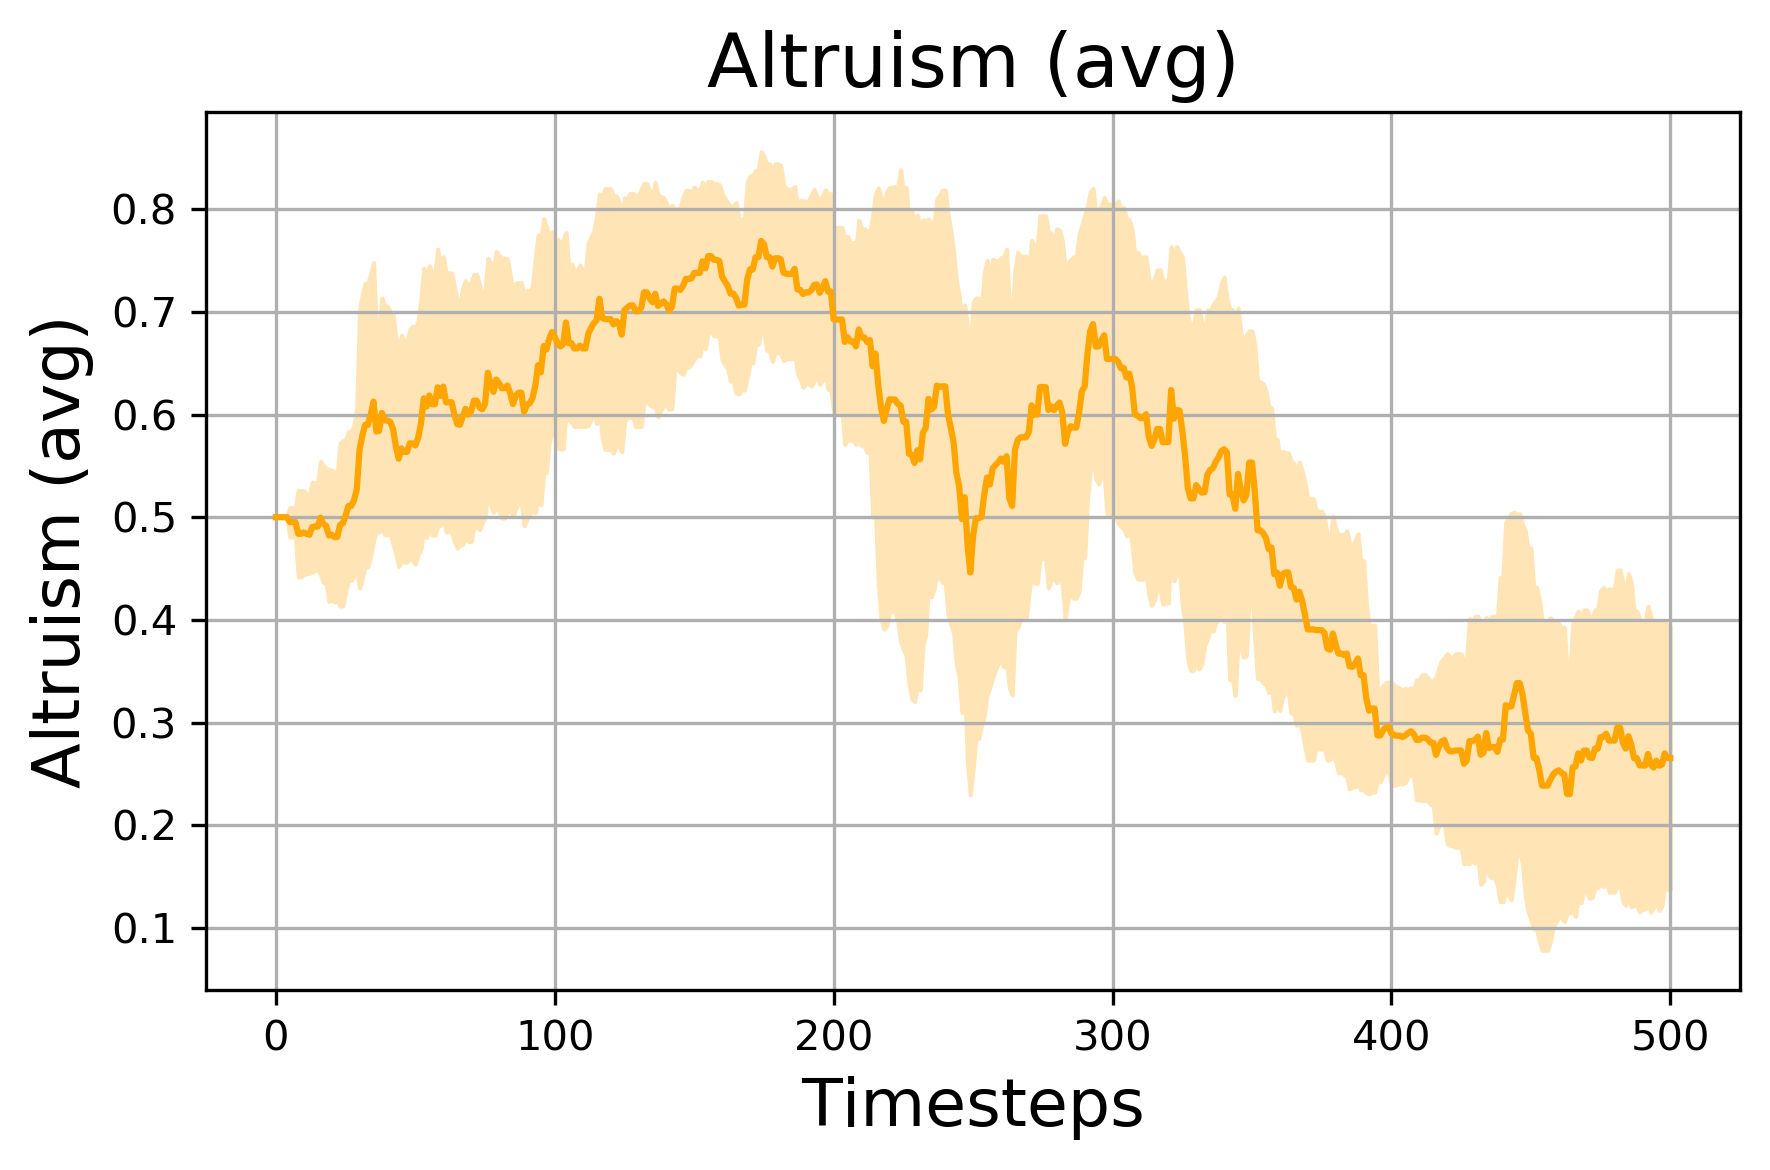

number_grass_growth           5
Run                          49
amount_grass_growth           4
bison_reproduce_threshold    10
Name: 49, dtype: int64


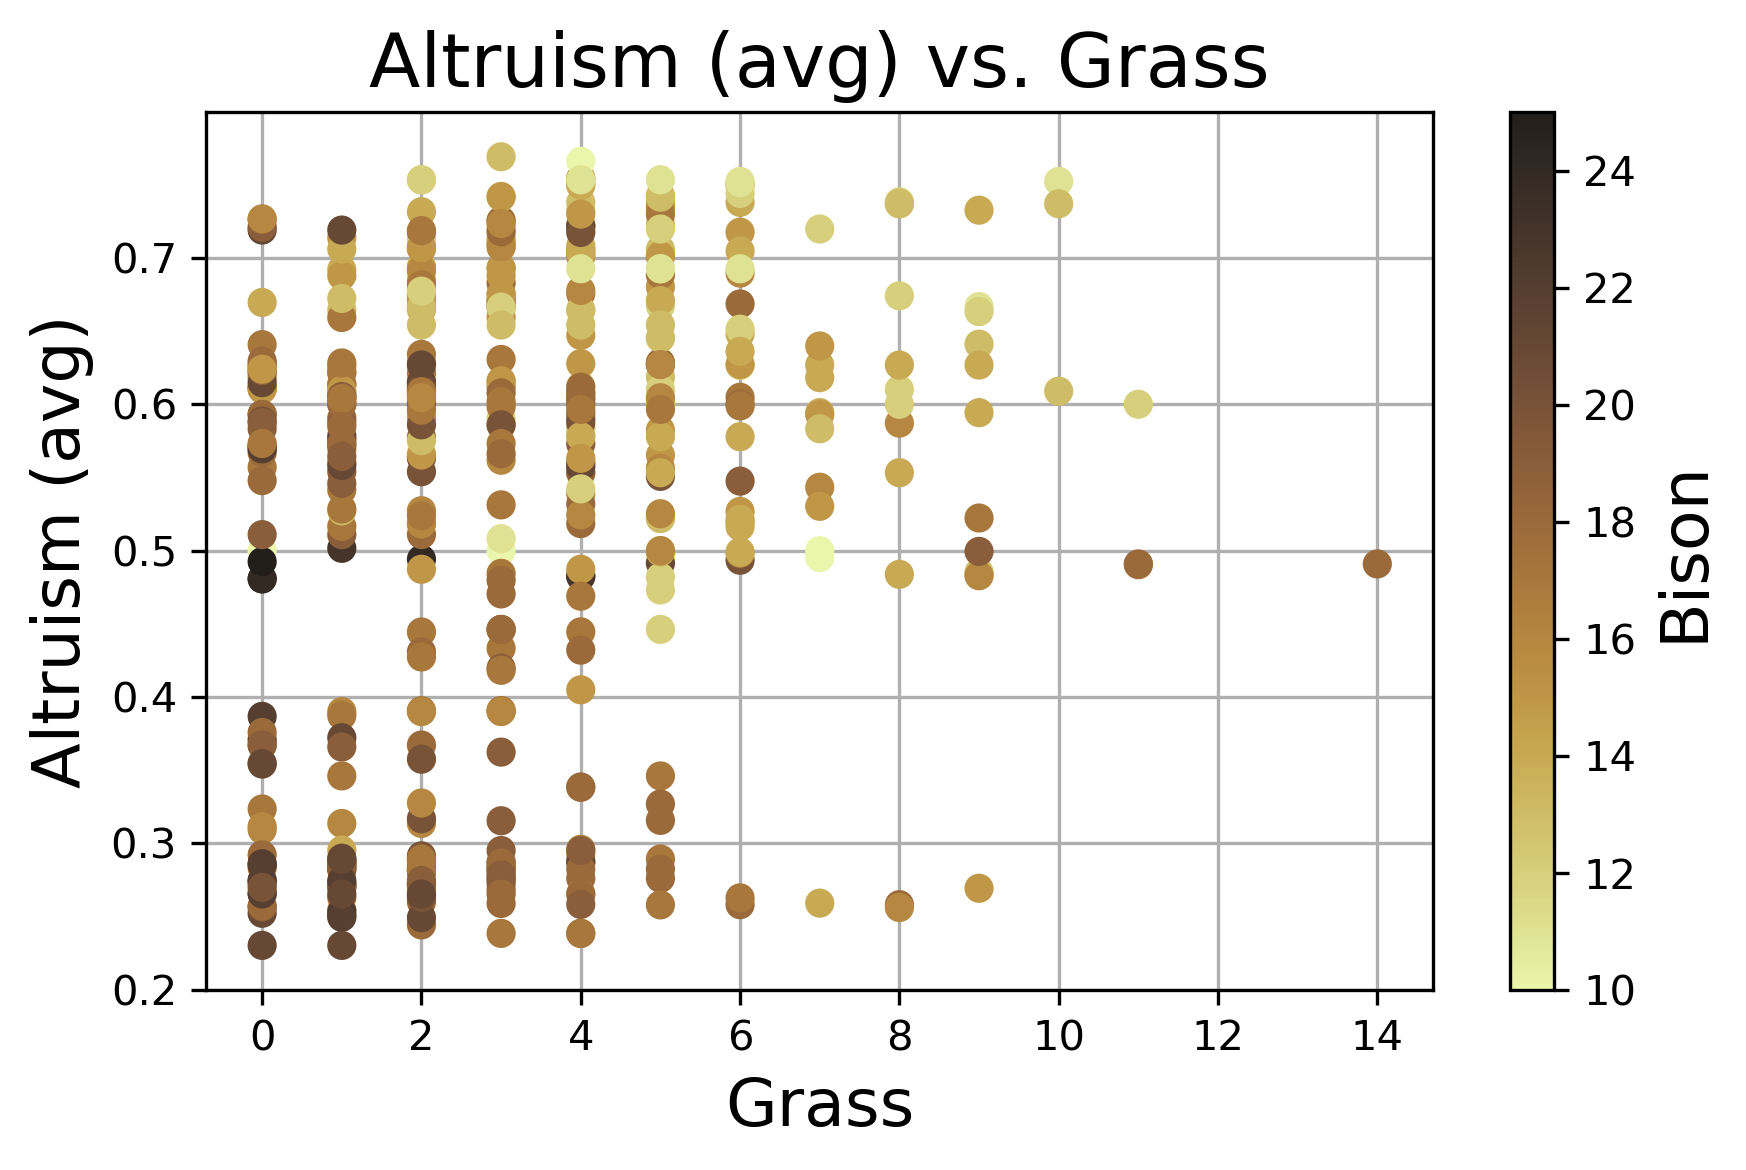

In [228]:
exp_num = 49

exp_data = results.loc[exp_num]
data_names = exp_data.columns

t0 = 0; t1 = 500
v = 3 # 1=Bisons , 2=Grass, 3=Average ALtruism, 4 SD altruism 

if v in [1,2]:
    plt.plot(exp_data[data_names[v-1]].loc[t0:t1], color=colors[v-1])
if v==3: 
    x = np.arange(t0, t1+1)
    y = exp_data[data_names[v-1]].loc[t0:t1]
    error = exp_data[data_names[v]].loc[t0:t1]
#     plt.errorbar(x, y, yerr = error, color=colors[v-1], ecolor=colors[v])
    plt.plot(y, color=colors[v-1])
    plt.fill_between(x, y-error, y+error, color=colors[v])
plt.title(data_names[v-1])
plt.xlabel(timestep_str)
plt.ylabel(data_names[v-1])
plt.grid()
plt.tight_layout()
plt.savefig('Plots\Test_Line.png')
print(params.loc[exp_num])
plt.show()

t0 = 0; t1 = 500
vx = 2; vy = 3; vc = 1 # 1=Bison , 2=Grass, 3=Average ALtruism, 4 SD altruism 
# colormap = 'RdYlGn' 
colormap = cmocean.cm.turbid

x = exp_data[data_names[vx-1]].loc[t0:t1]
y = exp_data[data_names[vy-1]].loc[t0:t1]
c = exp_data[data_names[vc-1]].loc[t0:t1]

plt.grid()
plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
plt.title(f'{data_names[vy-1]} vs. {data_names[vx-1]}')
plt.xlabel(data_names[vx-1])
plt.ylabel(data_names[vy-1])
cbar = plt.colorbar()
cbar.set_label(data_names[vc-1])
plt.tight_layout()
plt.savefig('Plots\Test_Scatter.png')
print(params.loc[exp_num])
plt.show()

number_grass_growth           5
Run                          49
amount_grass_growth           4
bison_reproduce_threshold    10
Name: 49, dtype: int64


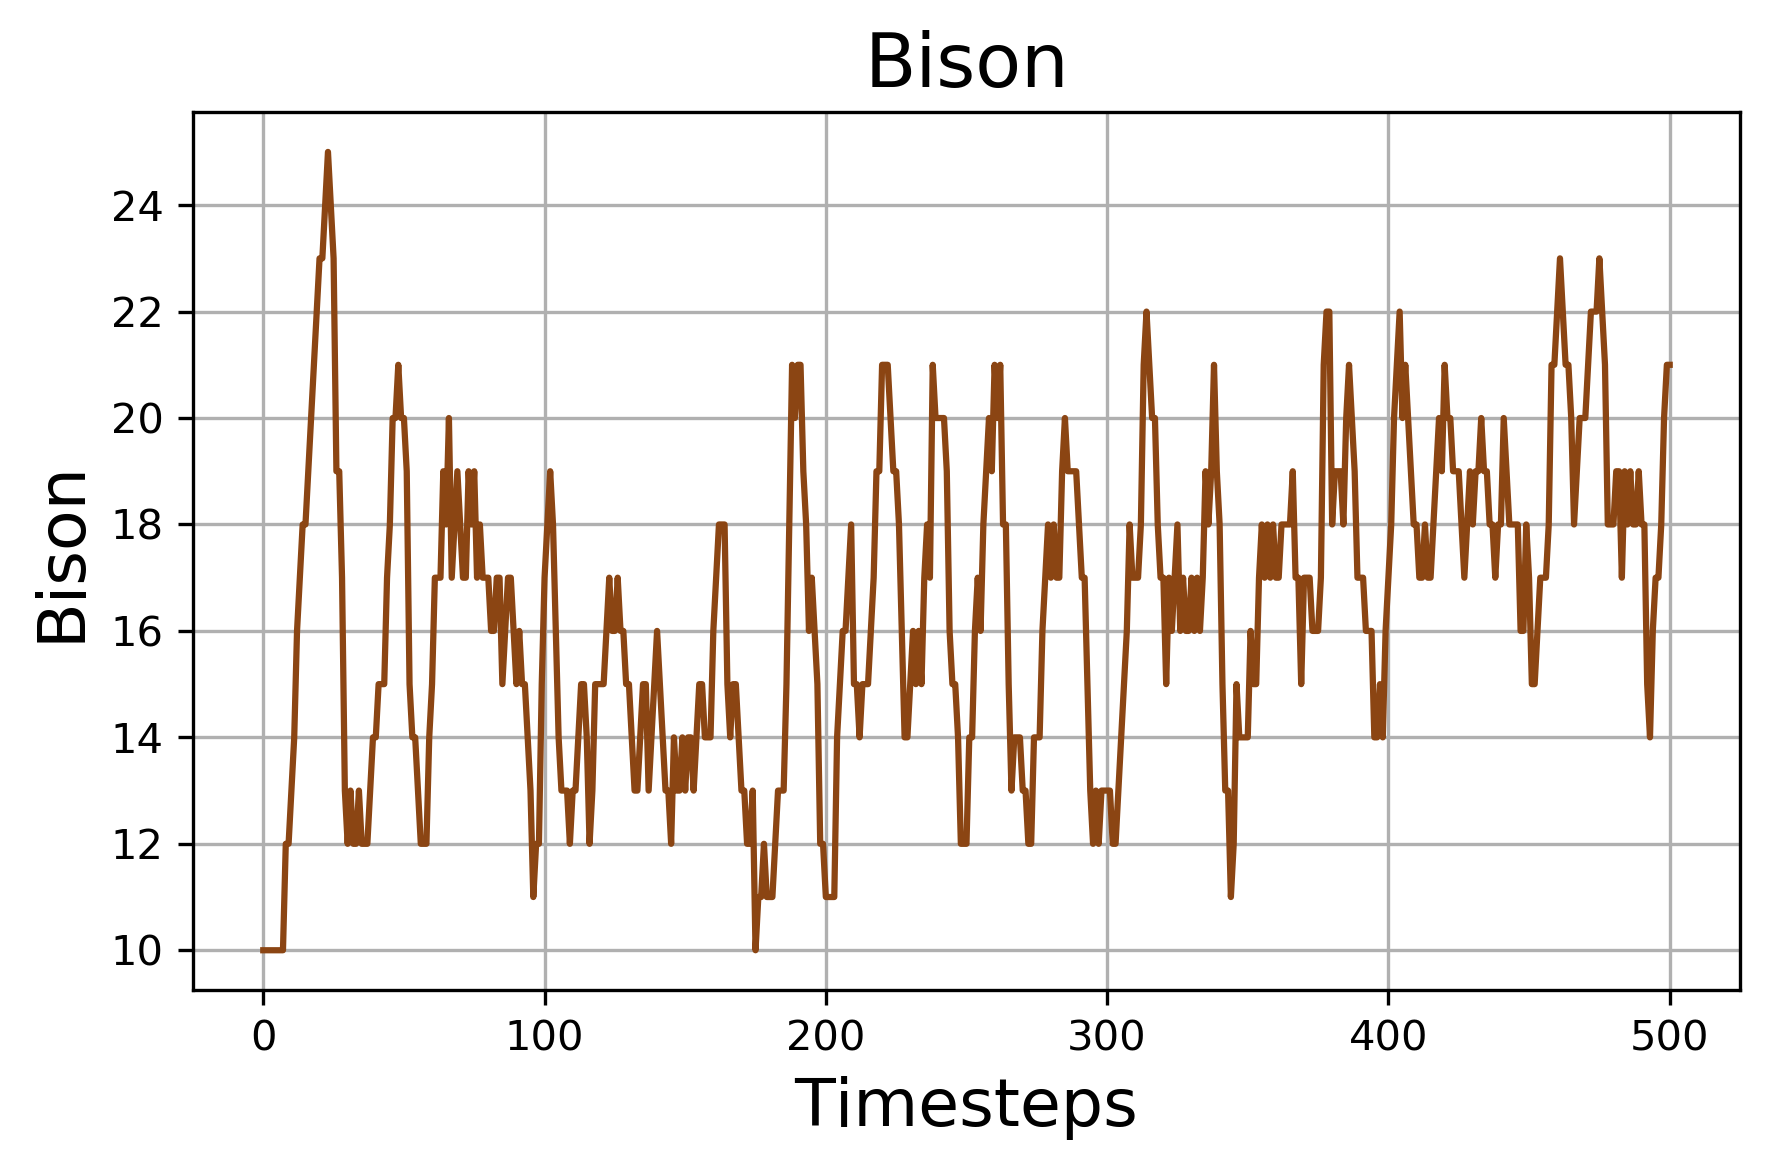

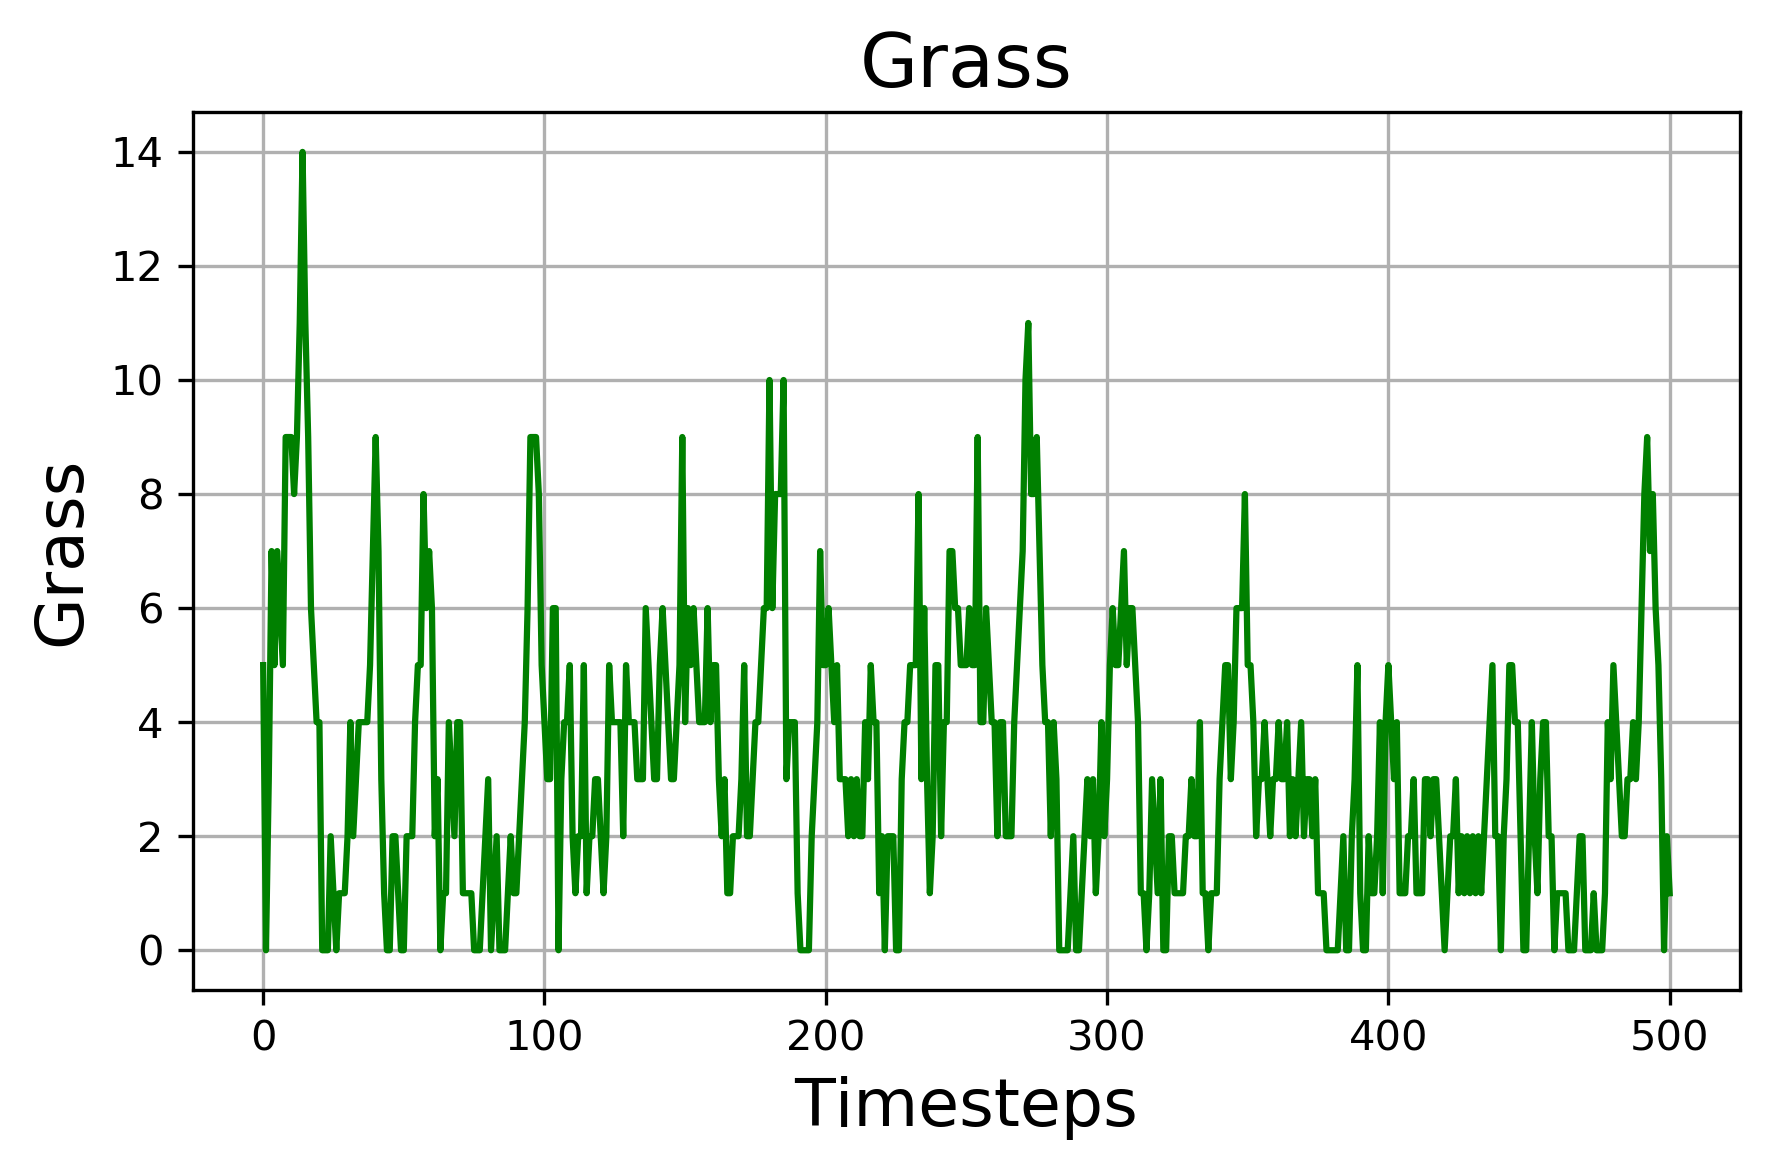

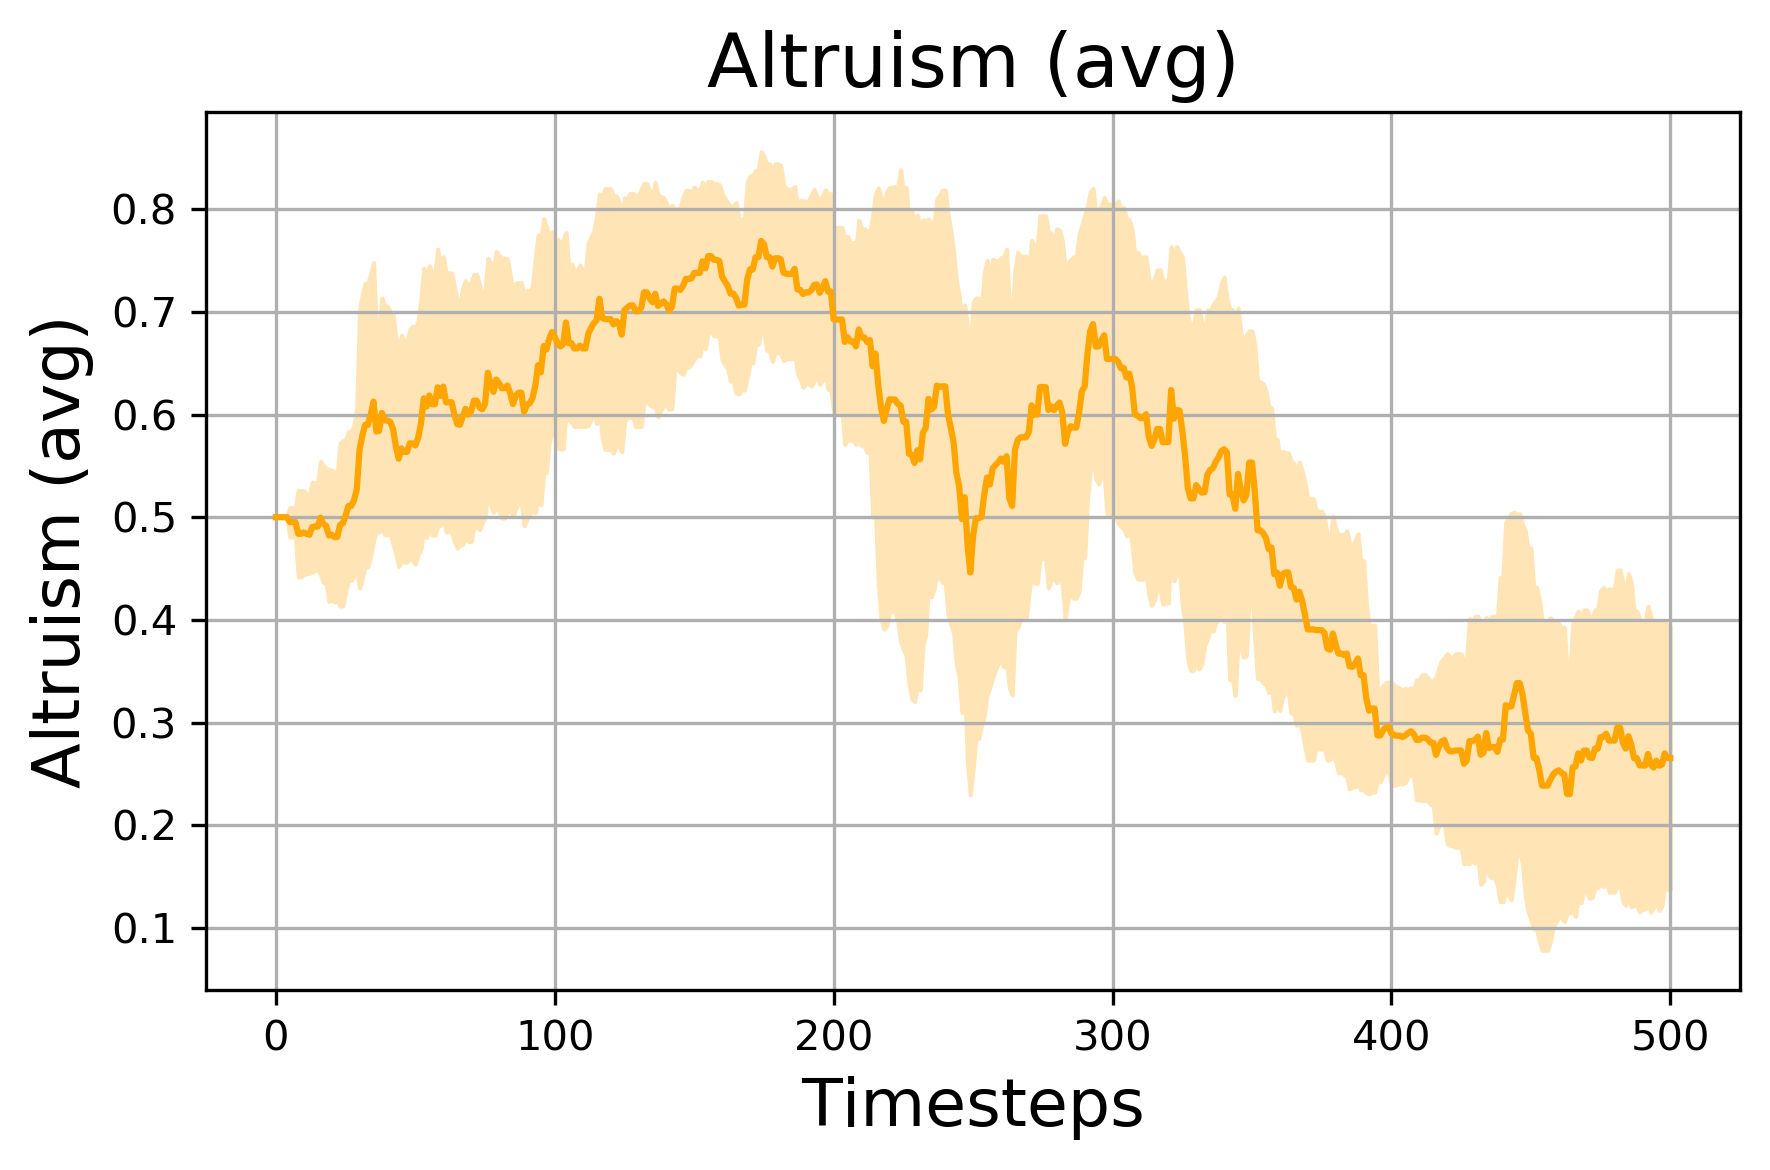

In [231]:
exp_num = 49
t0 = 0; t1 = 500

exp_data = results.loc[exp_num]
data_names = exp_data.columns

print(params.loc[exp_num])

v=1
plt.plot(exp_data[data_names[v-1]].loc[t0:t1], color=colors[v-1])
plt.title(data_names[v-1])
plt.xlabel(timestep_str)
plt.ylabel(data_names[v-1])
plt.grid()
plt.tight_layout()
plt.show()

v=2
plt.plot(exp_data[data_names[v-1]].loc[t0:t1], color=colors[v-1])
plt.title(data_names[v-1])
plt.xlabel(timestep_str)
plt.ylabel(data_names[v-1])
plt.grid()
plt.tight_layout()
plt.show()

v=3
x = np.arange(t0, t1+1)
y = exp_data[data_names[v-1]].loc[t0:t1]
error = exp_data[data_names[v]].loc[t0:t1]
plt.plot(y, color=colors[v-1])
plt.fill_between(x, y-error, y+error, color=colors[v])
plt.title(data_names[v-1])
plt.xlabel(timestep_str)
plt.ylabel(data_names[v-1])
plt.grid()
plt.tight_layout()
plt.show()

## AVERAGES

In [223]:
avg_per_run = results.mean(axis=0, level=0)
avg_per_run['number_grass_growth'] = params['number_grass_growth']
data_names = list(avg_per_run.columns)

number_grass_growth           6
Run                          50
amount_grass_growth           4
bison_reproduce_threshold    10
Name: 50, dtype: int64


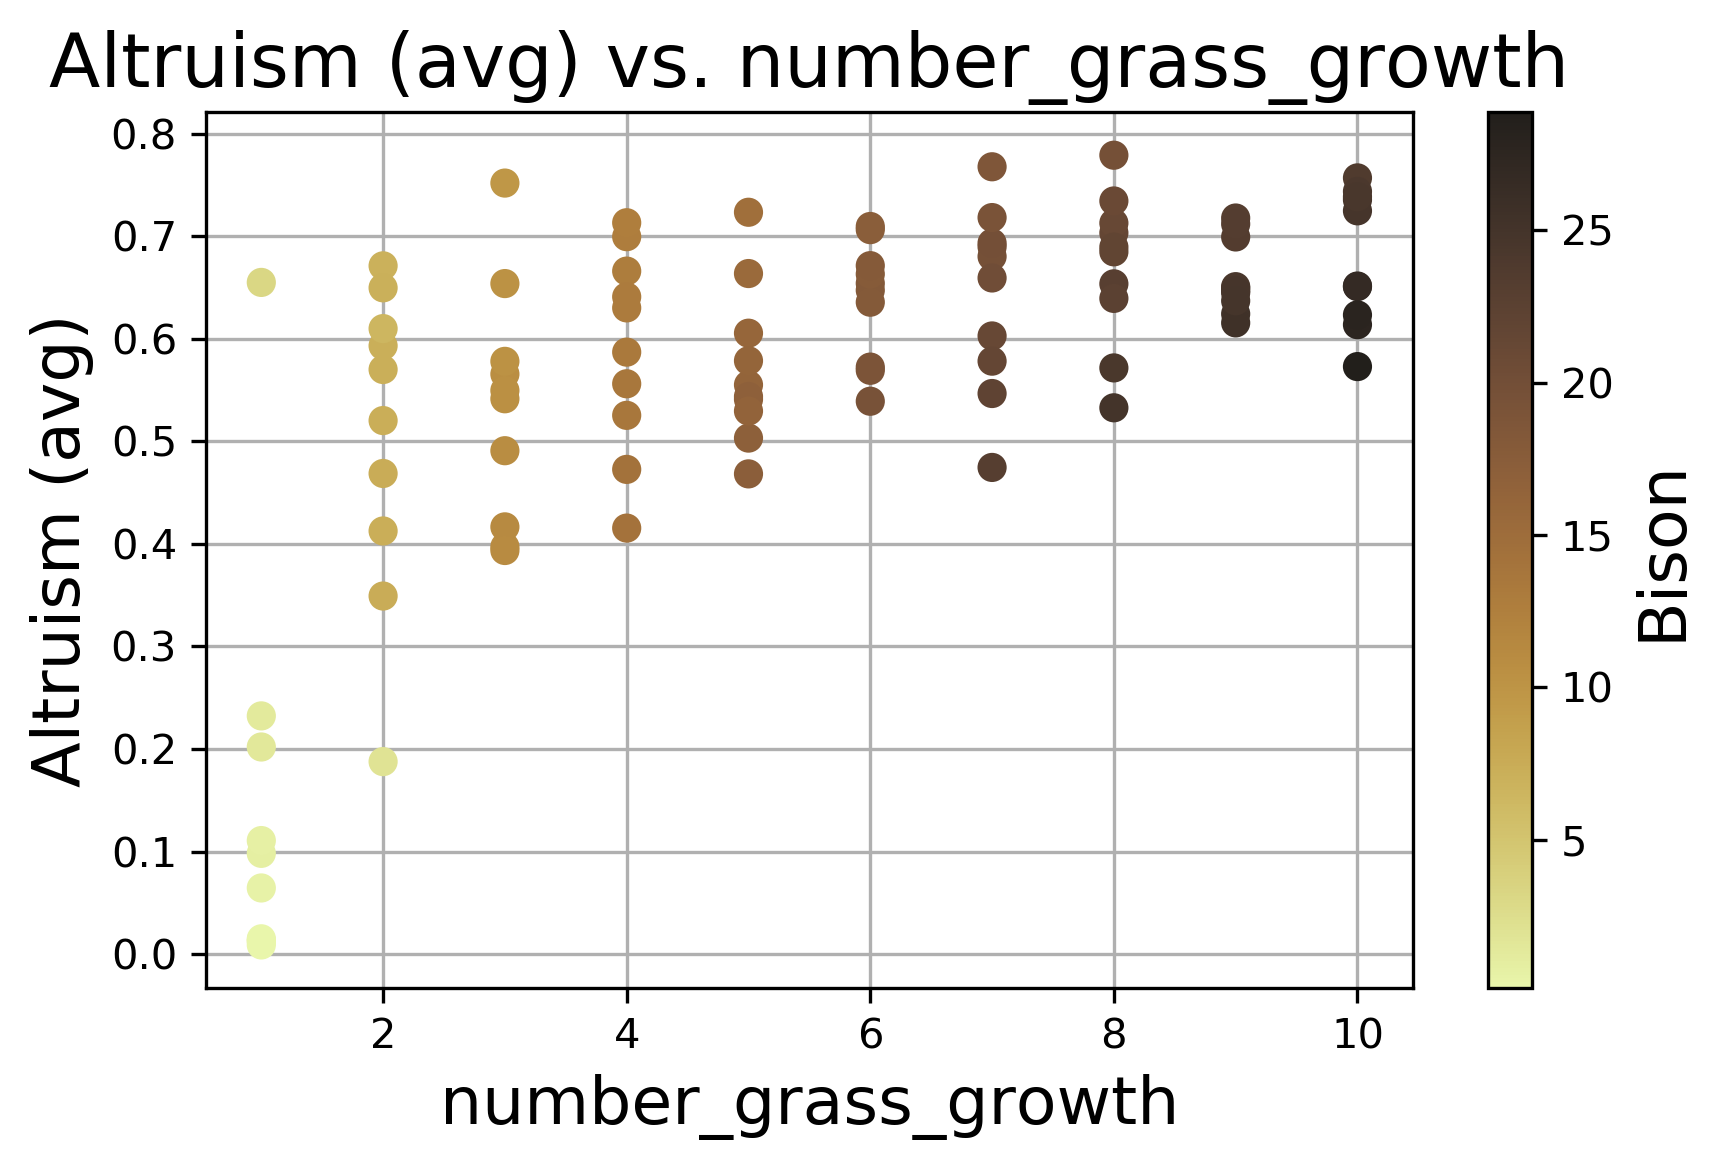

In [224]:
vx = 5; vy = 3; vc = 1 # 1=Bison , 2=Grass, 3=Average ALtruism, 4 SD altruism # 5 Grass growth 
# colormap = 'RdYlGn' 
colormap = cmocean.cm.turbid

x = avg_per_run[data_names[vx-1]].loc[t0:t1]
y = avg_per_run[data_names[vy-1]].loc[t0:t1]
c = avg_per_run[data_names[vc-1]].loc[t0:t1]

plt.grid()
plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
plt.title(f'{data_names[vy-1]} vs. {data_names[vx-1]}')
plt.xlabel(data_names[vx-1])
plt.ylabel(data_names[vy-1])
cbar = plt.colorbar()
cbar.set_label(data_names[vc-1])
plt.tight_layout()
plt.savefig('Plots\Test_Scatter.png')
print(params.loc[exp_num])
plt.show()

number_grass_growth           6
Run                          50
amount_grass_growth           4
bison_reproduce_threshold    10
Name: 50, dtype: int64


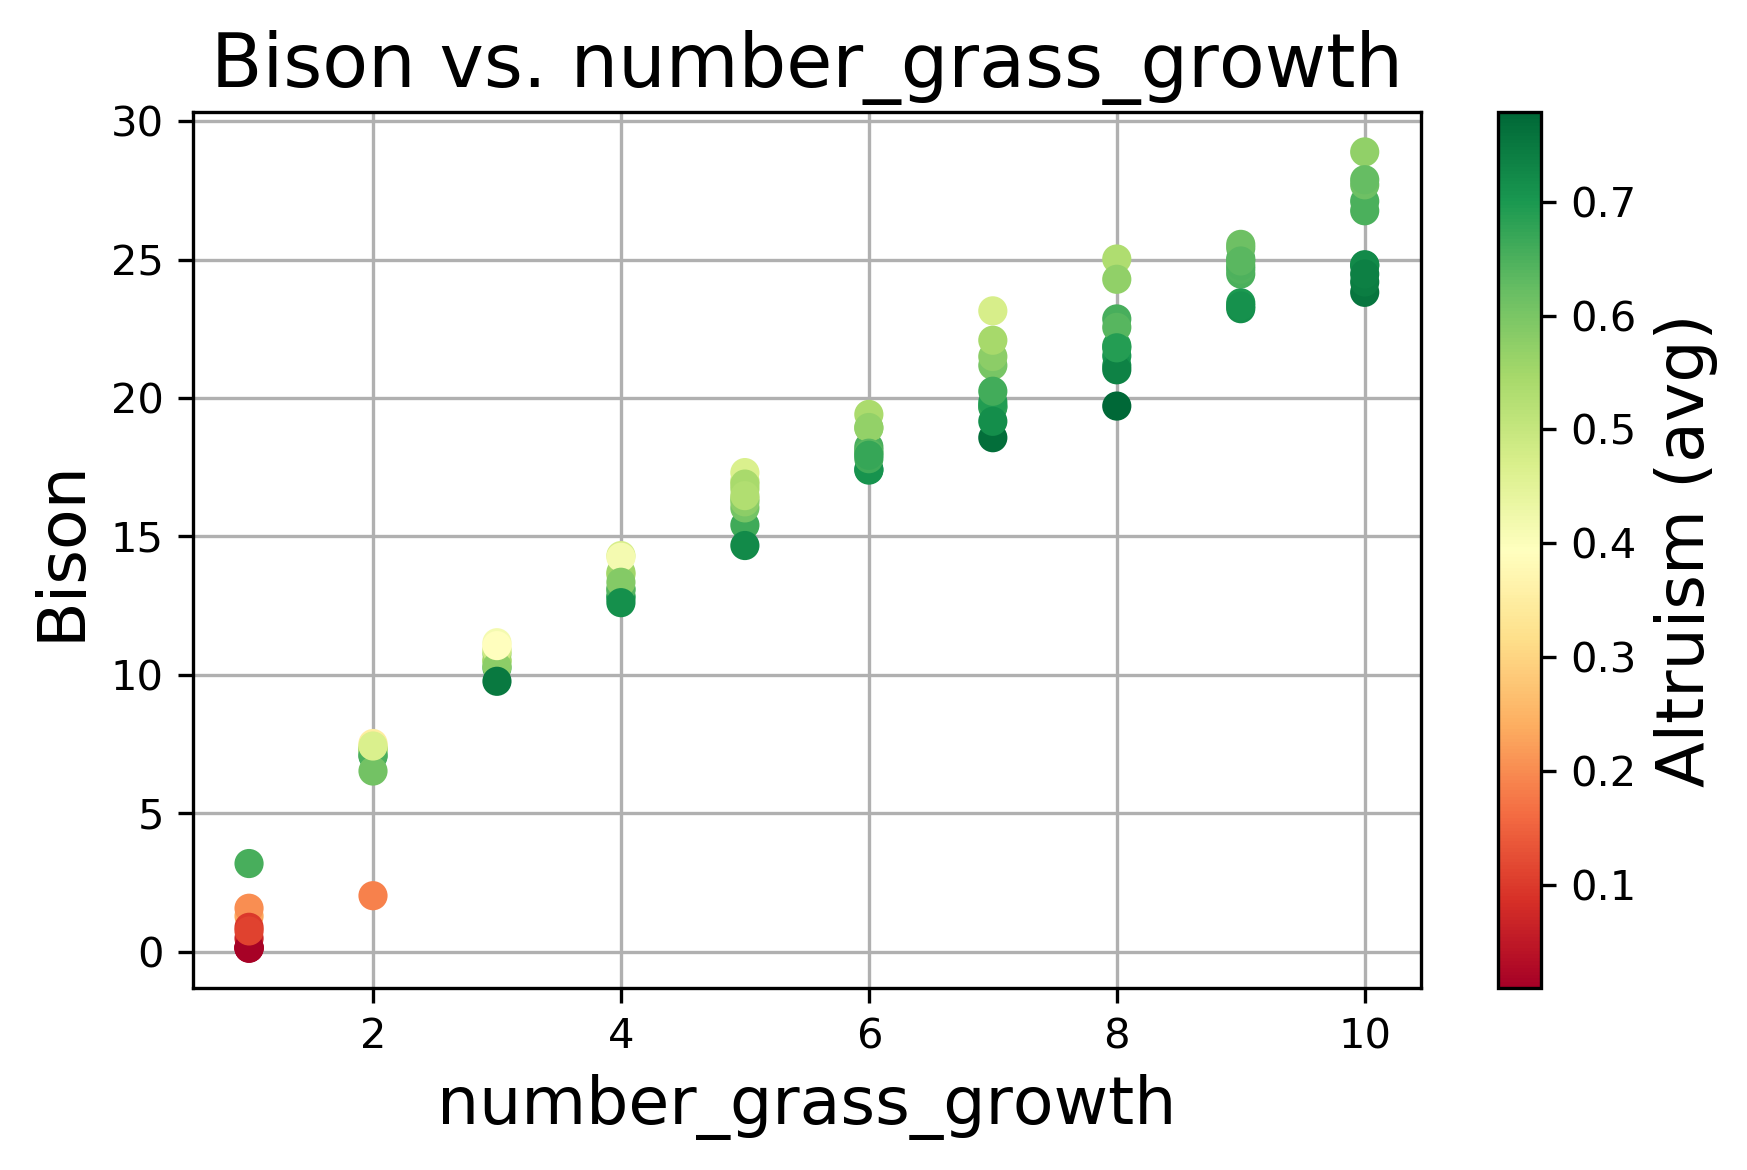

In [225]:
vx = 5; vy = 1; vc = 3 # 1=Bison , 2=Grass, 3=Average ALtruism, 4 SD altruism # 5 Grass growth 
colormap = 'RdYlGn' 
# colormap = cmocean.cm.turbid

x = avg_per_run[data_names[vx-1]].loc[t0:t1]
y = avg_per_run[data_names[vy-1]].loc[t0:t1]
c = avg_per_run[data_names[vc-1]].loc[t0:t1]

plt.grid()
plt.scatter(x, y, c=c, cmap=colormap, zorder=10)
plt.title(f'{data_names[vy-1]} vs. {data_names[vx-1]}')
plt.xlabel(data_names[vx-1])
plt.ylabel(data_names[vy-1])
cbar = plt.colorbar()
cbar.set_label(data_names[vc-1])
plt.tight_layout()
plt.savefig('Plots\Test_Scatter.png')
print(params.loc[exp_num])
plt.show()